# Computational Physics Exercise 1
### Jan Kesting, Felix Fleischle - 5.5.2023 - Tutor: Jeong Yun Choi

#### In this exercise we are going to compute the two body problem with two different methods, the forward euler method, and the leap frog. We are also going to test their accuracy by looking at energy conservation.

#### Implementing the euler scheme for the two body problem
The implementation is mainly copied from the implementation we did in the tutorial

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# A function for calculating the energy
def energy(s, w):
    w2 = np.sum(w*w)
    s2 = np.sum(s*s)
    return 0.5 * w2 - 1./np.sqrt(s2)

In [3]:
# a function for calculating the runge-lenz-vector
def rl_vector(s, w):
    w2 = np.sum(w*w)
    s2 = np.sum(s*s)
    sw = np.sum(s*w)
    return s * w2 - sw * w - s * 1./np.sqrt(s2)

In [4]:
# A function for calculating the orbit duration
def T_orbit(s, w):
    a = -1.0 / energy(s, w)
    return np.sqrt(2 * np.pi**2 * a**3)

In [5]:
# A function for calculating the acceleration
def accel(sn):
    s_sq = np.sum(sn * sn)
    s = np.sqrt(s_sq)
    s3 = s_sq * s
    return - sn / s3

In [6]:
# a function for computing the forward euler
def FwdEuler(s0, w0, deltaT, n):
    s_out = np.zeros((n+1,3))
    w_out = np.zeros((n+1,3))
    s_out[0,:] = s0.copy()
    w_out[0,:] = w0.copy()
    s_np1 = s0.copy()
    w_np1 = w0.copy()
    for i in range(n):
        s_n = s_np1.copy()
        w_n = w_np1.copy()
        s_np1 = s_n + w_n * deltaT
        w_np1 = w_n + deltaT * accel(s_n)
        s_out[i+1,:] = s_np1.copy()
        w_out[i+1,:] = w_np1.copy()
    return s_out, w_out

### a) Forward Euler

Testing three different starting velocities:

In [7]:
# Starting velocity = 1 : (ideally) circular orbit
s_start = np.array([1.,0.,0.])
w_start = np.array([0.,1.,0.])

s_end, w_end = FwdEuler(s_start, w_start, 0.01, 2000)

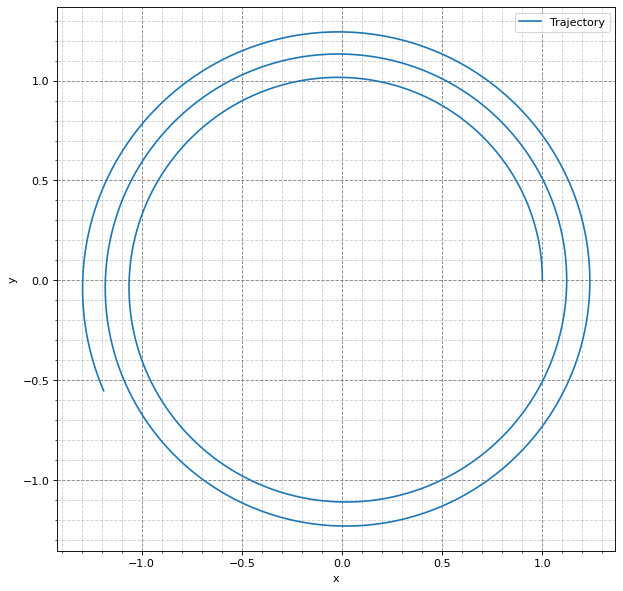

In [8]:
# Let's plot a simple trajectory
x = []
y = []
# calculating the eccentricity here as well
e = []

for i in range(len(s_end)):
    # adding x and y values to the arrays
    x.append(s_end[i,0])
    y.append(s_end[i,1])
    
    # calculating the eccentricity of the orbit (which should be ideally be conserved)
    eccentricity = rl_vector(s_end[i], w_end[i])
    eccentricity = np.sum(eccentricity * eccentricity)
    eccentricity = np.sqrt(eccentricity)
    e.append(eccentricity)
    
    
x = np.asarray(x)
y = np.asarray(y)
e = np.asarray(e)

# Plot
plt.figure(figsize=(9,9), dpi=80)
plt.plot(x,y, label='Trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
plt.minorticks_on()
plt.legend()
#plt.axis('equal')

We can see that the orbit is not perfectly circular as it should be with an initial velocity of 1.

In [9]:
# printing the eccentricity over the course of the integration

print(e)

[0.         0.00015    0.0003     ... 0.02766563 0.02764606 0.02762623]


We can also see that the eccentricity is not conserved and is slowly increasing from 0 (ciruclar). This is due to the first order accuracy of the forward euler method.

Testing a second initial velocity: 0.8 - The code is exactly the same as above, just with a different starting velocity

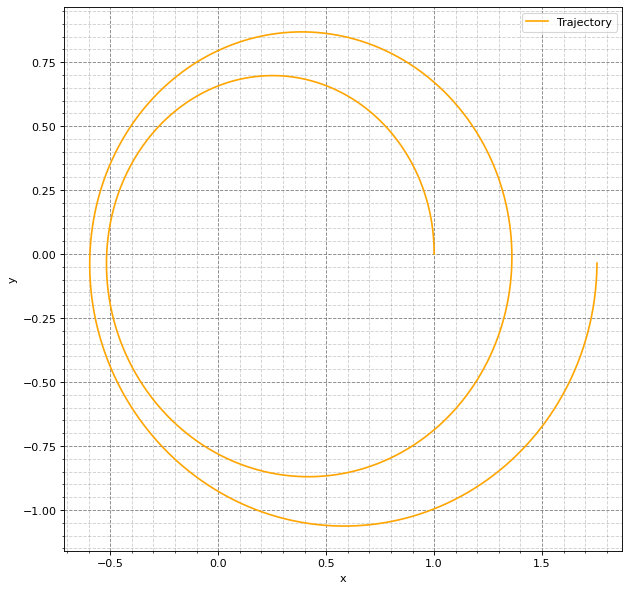

In [10]:
s_start = np.array([1.,0.,0.])
w_start = np.array([0.,0.8,0.])

s_end, w_end = FwdEuler(s_start, w_start, 0.01, 1200)

x = []
y = []
# calculating the eccentricity here as well
e = []

for i in range(len(s_end)):
    # adding x and y values to the arrays
    x.append(s_end[i,0])
    y.append(s_end[i,1])
    
    # calculating the eccentricity of the orbit (which should be ideally be conserved)
    eccentricity = rl_vector(s_end[i], w_end[i])
    eccentricity = np.sum(eccentricity * eccentricity)
    eccentricity = np.sqrt(eccentricity)
    e.append(eccentricity)
    
    
x = np.asarray(x)
y = np.asarray(y)
e = np.asarray(e)

# Plot
plt.figure(figsize=(9,9), dpi=80)
plt.plot(x,y, label='Trajectory', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
plt.minorticks_on()
plt.legend()

In [11]:
print(e)

[0.36       0.359904   0.35980801 ... 0.47337247 0.47335785 0.47334323]


Here the same observations can be made, due to the first order accuracy, the orbit deviates slightly, and the eccentricity is not conserved and keeps increasing.

Testing a third velocity: 0.6

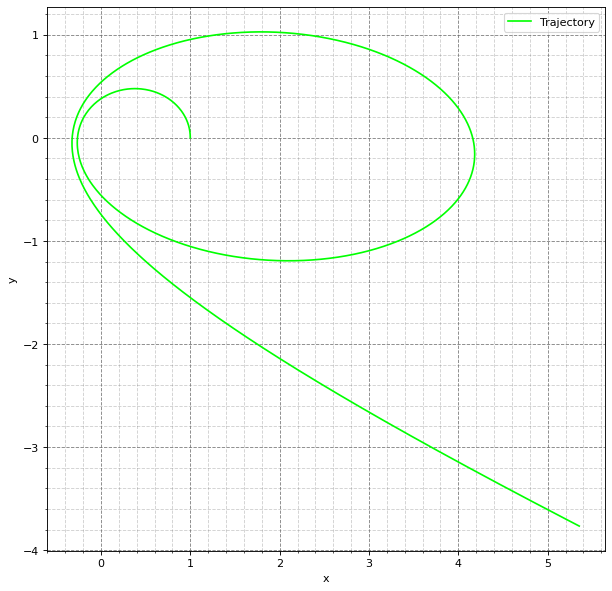

In [12]:
s_start = np.array([1.,0.,0.])
w_start = np.array([0.,0.6,0.])

s_end, w_end = FwdEuler(s_start, w_start, 0.01, 3000)

x = []
y = []
# calculating the eccentricity here as well
e = []

for i in range(len(s_end)):
    # adding x and y values to the arrays
    x.append(s_end[i,0])
    y.append(s_end[i,1])
    
    # calculating the eccentricity of the orbit (which should be ideally be conserved)
    eccentricity = rl_vector(s_end[i], w_end[i])
    eccentricity = np.sum(eccentricity * eccentricity)
    eccentricity = np.sqrt(eccentricity)
    e.append(eccentricity)
    
    
x = np.asarray(x)
y = np.asarray(y)
e = np.asarray(e)

# Plot - the 
plt.figure(figsize=(9,9), dpi=80)
plt.plot(x,y, label='Trajectory', color='lime')
plt.xlabel('x')
plt.ylabel('y')
#plt.hlines(1, -1, 1, color='red', label='-1,-1,1,1 square')
#plt.hlines(-1, -1, 1, color='red')
#plt.vlines(1, -1, 1, color='red')
#plt.vlines(-1, -1, 1, color='red')
plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
plt.minorticks_on()
plt.legend()
#plt.axis('equal')

In [13]:
print(e)

[0.64       0.639946   0.639892   ... 1.05162688 1.05162683 1.05162678]


Again the same observations can be made, with the eccentricity even surpassing 1 and making the orbit unstable

### Testing different time steps and doing Energy error analysis

We now choose a circular orbit with inital velocity 1 and vary the time step

In [14]:
# Starting velocity = 1 : (ideally) circular orbit
s_start = np.array([1.,0.,0.])
w_start = np.array([0.,1.,0.])

# choosing different timesteps
t_array = np.logspace(-1, -5, 5)

# calculate the starting energy
E_0 = energy(s_start, w_start)
# creating array to store the energy errors in
E_err_array = []

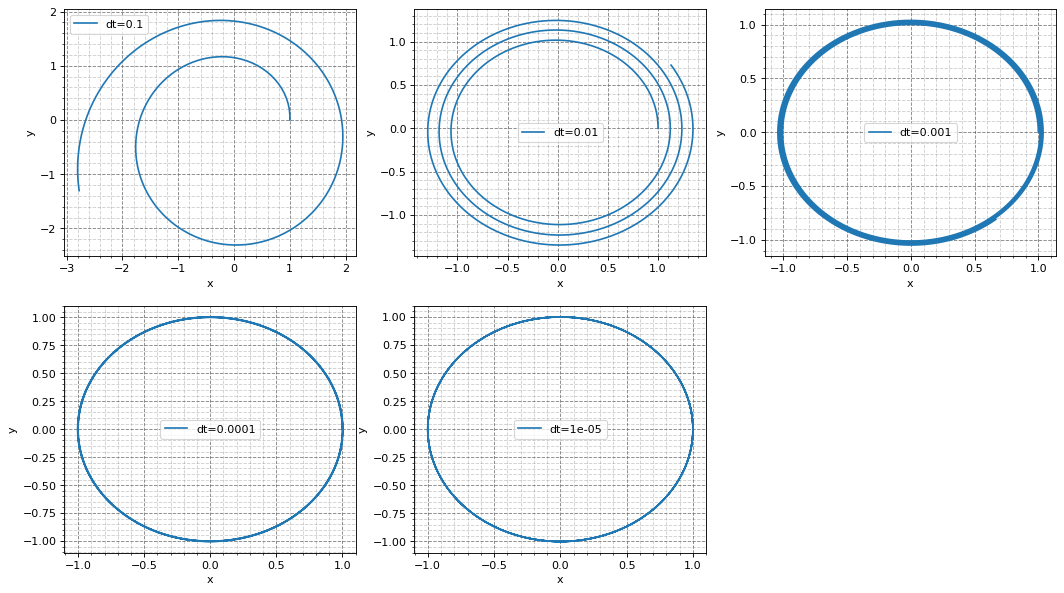

In [15]:
# Doing a forward euler for all different timesteps
plt.figure(figsize=(16,9), dpi=80)
for j in range(len(t_array)):
    # calculate the required number of iterations from the orbit time
    n_itr = 2 * T_orbit(s_start, w_start) / t_array[j]
    s_end, w_end = FwdEuler(s_start, w_start, t_array[j], int(n_itr))


    # Let's plot a simple trajectory
    x = []
    y = []
    # calculating the eccentricity here as well
    e = []

    for i in range(len(s_end)):
        # adding x and y values to the arrays
        x.append(s_end[i,0])
        y.append(s_end[i,1])
    
        # calculating the eccentricity of the orbit (which should be ideally be conserved)
        eccentricity = rl_vector(s_end[i], w_end[i])
        eccentricity = np.sum(eccentricity * eccentricity)
        eccentricity = np.sqrt(eccentricity)
        e.append(eccentricity)
    
    
    x = np.asarray(x)
    y = np.asarray(y)
    e = np.asarray(e)

    plt.subplot(2,3,j+1)
    plt.plot(x,y, label='dt=' + str(t_array[j]))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
    plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
    plt.minorticks_on()
    plt.legend()
    #plt.axis('equal')
    
    #print(e)
    
    # Calculating the energy error for this timestep
    e_error = energy(s_end[len(s_end)-1], w_end[len(w_end)-1]) - E_0
    E_err_array.append(e_error)

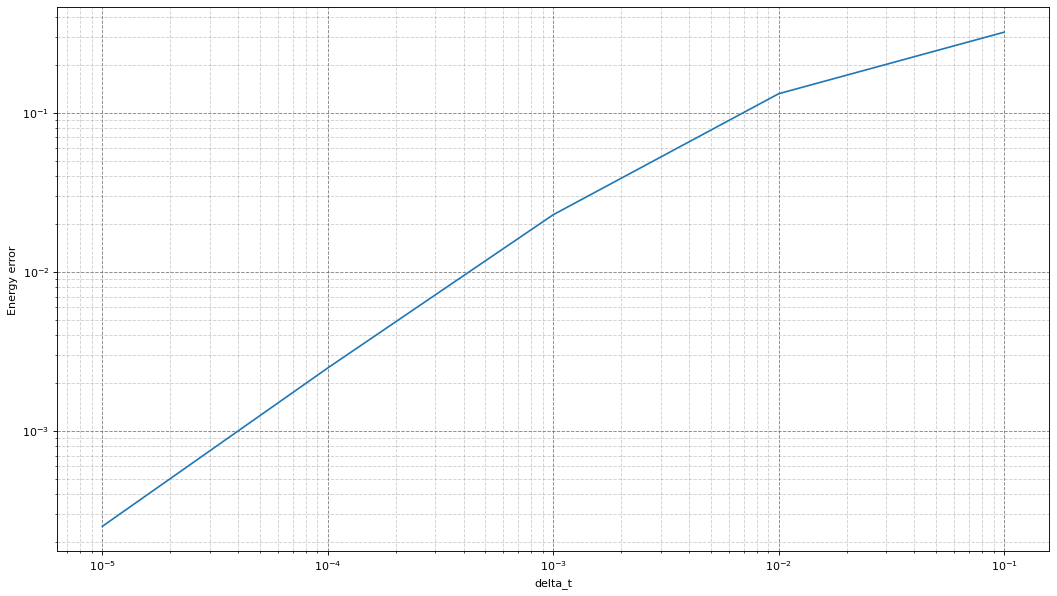

In [16]:
# plotting the energy error
E_err_array = np.asarray(E_err_array)

plt.figure(figsize=(16,9), dpi=80)
plt.plot(t_array, E_err_array)
plt.xlabel('delta_t')
plt.ylabel('Energy error')
plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
plt.xscale('log')
plt.yscale('log')
plt.minorticks_on()

We can see that the energy error increases heavily with time step duration, since the forward euler method only has 1st order accuracy in delta t.

### b)  Leap frog

Implementing the leap frog scheme:

In [17]:
# a function for computing the leap frog
def LeapFrog(s0, w0, deltaT, n):
    s_out = np.zeros((n+1,3))
    w_out = np.zeros((n+1,3))
    # the position will be at the full time steps
    s_out[0,:] = s0.copy()
    # the velocity will be at the half time steps
    w_out[0,:] = w0.copy()
    # kickstart - calculating w_1/2, s1
    w_np05 = w0.copy() + accel(s0.copy())*deltaT/2
    s_np1 = s0.copy() + w_np05 * deltaT

    # adding the first entries from the kickstart to the list
    s_out[1,:] = s_np1.copy()
    w_out[1,:] = w_np05.copy()
    # actual leap frog - with velocity at half time steps and position at full time steps
    # Starting the for loop at 1 since the i=1 index is already filled
    for i in range(1,n):
        # note that w_n lives a half step behind s_n
        # for example, in the first iteration of the loop the following calculations are done:
        # w_3/2 = w_1/2 + deltaT * a(s_1)
        # s_2 = s_1 + deltaT * w_3/2
        
        s_n = s_np1.copy()
        w_n = w_np05.copy()
        # Calculating the new velocity
        w_np05 = w_n + deltaT * accel(s_n)
        # Calculating the new position
        s_np1 = s_n + w_np05 * deltaT
        
        s_out[i+1,:] = s_np1.copy()
        w_out[i+1,:] = w_np05.copy()
    return s_out, w_out

Testing an initial velocity of 1 with the leap frog method:

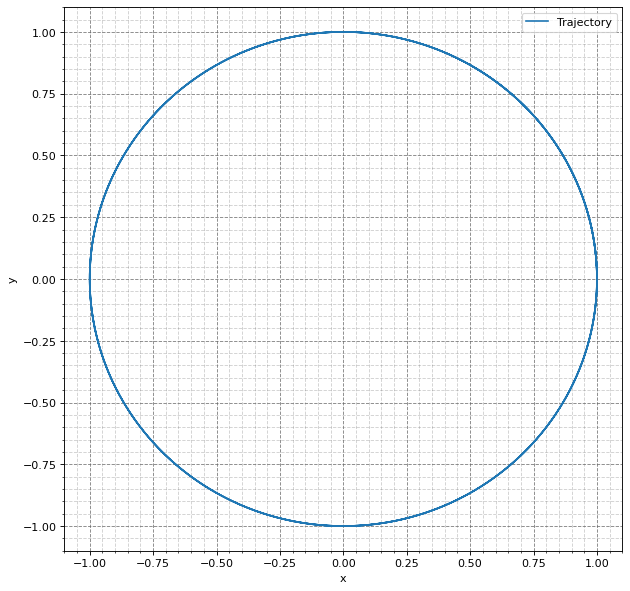

In [18]:
# Starting velocity = 1 : (ideally) circular orbit
s_start = np.array([1.,0.,0.])
w_start = np.array([0.,1.,0.])

s_end, w_end = LeapFrog(s_start, w_start, 0.01, 2000)

# Let's plot a simple trajectory
x = []
y = []
# calculating the eccentricity here as well
e = []

for i in range(len(s_end)):
    # adding x and y values to the arrays
    x.append(s_end[i,0])
    y.append(s_end[i,1])
    
    # calculating the eccentricity of the orbit (which should be ideally be conserved)
    eccentricity = rl_vector(s_end[i], w_end[i])
    eccentricity = np.sum(eccentricity * eccentricity)
    eccentricity = np.sqrt(eccentricity)
    e.append(eccentricity)
    
    
x = np.asarray(x)
y = np.asarray(y)
e = np.asarray(e)

# Plot - the 
plt.figure(figsize=(9,9), dpi=80)
plt.plot(x,y, label='Trajectory')
plt.xlabel('x')
plt.ylabel('y')
#plt.hlines(1, -1, 1, color='red', label='-1,-1,1,1 square')
#plt.hlines(-1, -1, 1, color='red')
#plt.vlines(1, -1, 1, color='red')
#plt.vlines(-1, -1, 1, color='red')
plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
plt.minorticks_on()
plt.legend()
#plt.axis('equal')



In [19]:
# printing the eccentricity over the course of the integration

print(e)

[0.         0.00500025 0.0050005  ... 0.00502249 0.00502259 0.0050227 ]


We can see that the orbit stays a lot more circular, and the eccentricity is a lot better conserved, due to the higher accuracy of the leap frog method

### Energy error using different time steps - leap frog

Similar to before we choose different time steps and do an integration while calculating the energy error after two orbits.
Note that for the energy calculation, we have to do a half time step for the velocity at the end to get a synchronous velocity and position at the end.

In [20]:
# Starting velocity = 1 : (ideally) circular orbit
s_start = np.array([1.,0.,0.])
w_start = np.array([0.,1.,0.])

# choosing different timesteps
t_array = np.logspace(-1, -5, 5)

# calculate the starting energy
E_0 = energy(s_start, w_start)
# creating array to store the energy errors in
E_err_array = []

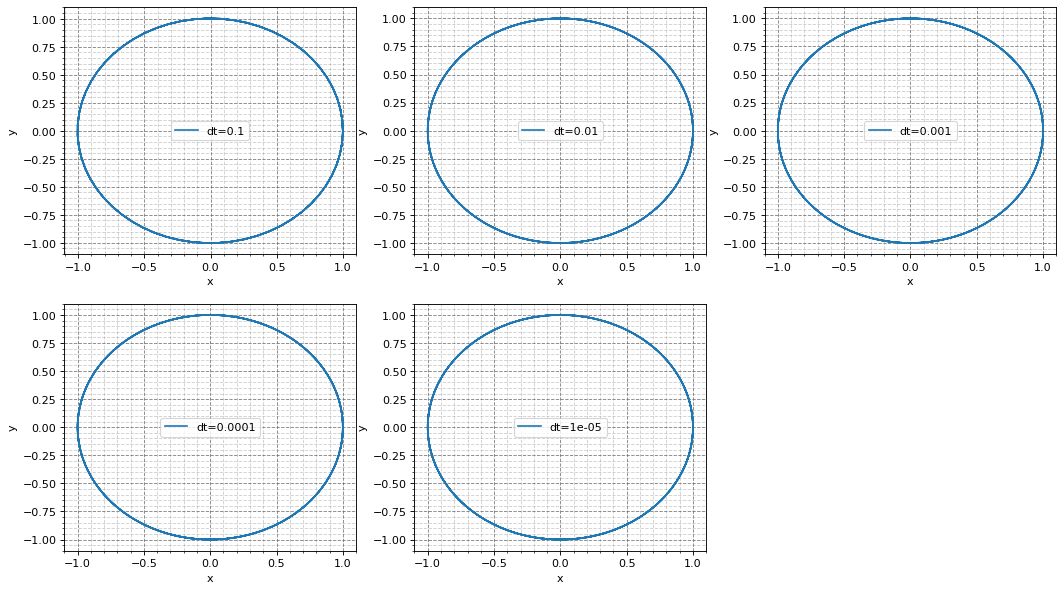

In [21]:
# Doing a forward euler for all different timesteps
plt.figure(figsize=(16,9), dpi=80)
for j in range(len(t_array)):
    # calculate the required number of iterations from the orbit time
    n_itr = 2 * T_orbit(s_start, w_start) / t_array[j]
    s_end, w_end = LeapFrog(s_start, w_start, t_array[j], int(n_itr))


    # Let's plot a simple trajectory
    x = []
    y = []
    # calculating the eccentricity here as well
    e = []

    for i in range(len(s_end)):
        # adding x and y values to the arrays
        x.append(s_end[i,0])
        y.append(s_end[i,1])
    
        # calculating the eccentricity of the orbit (which should be ideally be conserved)
        eccentricity = rl_vector(s_end[i], w_end[i])
        eccentricity = np.sum(eccentricity * eccentricity)
        eccentricity = np.sqrt(eccentricity)
        e.append(eccentricity)
    
    
    x = np.asarray(x)
    y = np.asarray(y)
    e = np.asarray(e)

    plt.subplot(2,3,j+1)
    plt.plot(x,y, label='dt=' + str(t_array[j]))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
    plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
    plt.minorticks_on()
    plt.legend()
    #plt.axis('equal')
    
    #print(e)
    
    # Calculating the energy error for this timestep
    # Doing an additional half time step for the velocity to get synchronous position and velocity at the end
    w_end_p05 = w_end[len(w_end)-1] + accel(s_end[len(s_end)-1]) * t_array[j]/2
    # calculating the energy error with the new velocity
    e_error = energy(s_end[len(s_end)-1], w_end_p05) - E_0
    E_err_array.append(e_error)

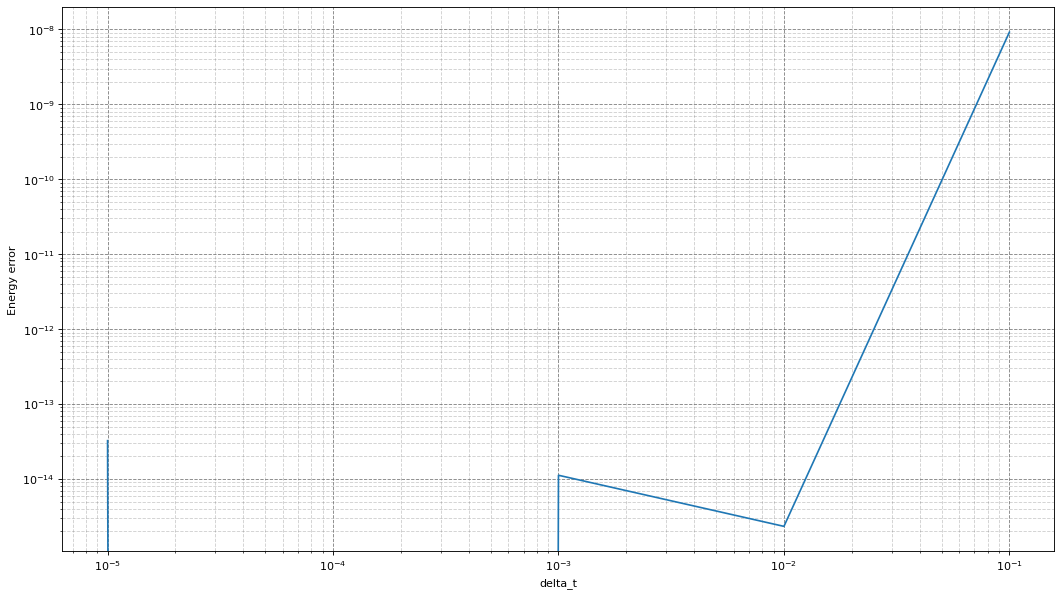

In [22]:
# plotting the energy error
E_err_array = np.asarray(E_err_array)

plt.figure(figsize=(16,9), dpi=80)
plt.plot(t_array, E_err_array)
plt.xlabel('delta_t')
plt.ylabel('Energy error')
plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
plt.xscale('log')
plt.yscale('log')
plt.minorticks_on()

One can see that the leapfrog method is much more accurate, with the energy error after two orbits being as low as 10^{-14} as compared to 10^{-3} for the forward euler. The energy error even reaches zero for one of the time step sizes, probably due to a rounding error in the energy error calculation.